# [Support of Anonymity in VANETs Putting Pseudonymity into Practice](https://www.researchgate.net/profile/Rui_Aguiar/publication/220973231_Support_of_Anonymity_in_VANETs_-_Putting_Pseudonymity_into_Practice/links/0deec51d620a6e2b3b000000.pdf)

- Authors: Emanuel Fonseca, Andreas Festag, Roberto Baldessari, Rui L. Aguiar

- Reviewer: Djibrilla Amadou Kountché

## Abstract

- Analysis of pratical challenges and proposes protocol and implementation related solutions for turning pseudonymity support in to reality. 

- Because:
  - unique identifiers for communication can make vehicles easily traceable and localizable
  - protection of dirver's privacy by the use of changing pseudonyms
  - exisiting works neglect pratical implications and realizability and focus on pseudonym change

### Keywords:
 - Vanet, Pseudonymity, Privacy

## The problem studied

- Communication protocols of a VANET node publicly diclose data:
   - address
   - position
   - speed
   - heading
   - time

- Crypthography and encryption are not appropriate since exchange of information is mandatory for network operation

- Use of pseudonyms to avoid disclosing the true identity but:

     - Pseudonymity only considerably aggravates the association of pseudonym and user identity, but cannot prevent an attacker to collect personal data
     
     - Proposals focus on how often node should change a pseudonym and whith whom it should communicate, but not practical issues

- Every node carries a unique identifier for session establishement and routing

### Architecture of VANET 

As described on the Figure 
![VANET achitecture](vanet.png "The VANET architecture considered in the paper")

-  In-vehicle sub-network contains:
    - On Board Unit (OBU)
    - Application Units (AU or APUs): user devices attached to the OBU

- Ad Hoc domain:
    -  OBU and stationary Road Side Units
    -  OBU and RSU can communicate directly or use multi-hop communication
    -  Support position based routing (PBR) for efficient and scalable communication:       
        - unicast: greedy forwarding
        - geocast: efficient packet broadcasting in a geographical area 

- Infrastructure domain:
    - provides connectivity to Internet (through the RSU when supported)

- PBR supports:
     - beaconing (periodically advertising identifier, position to direct neighbor nodes)
     - location service:  destination node is searched for its current location
 
- OBU:
    - maintains a soft-state _Location Table_ (LT) with at least the parameters of the correspondant nodes (Neighbors and non-neighbors):
         - identifier
         - position
         - speed
         - heading 
         - timestamp
         
    - fills the LT from packets, beacons processed

- LT is used for routing unicast packets and for choosing the next hop


### Hypothesis

- Every node has a unique and static Global ID (GID) and a set of pseudonyms (PID)
- Nodes exchange GID and GID's public key prior to unicast communication
- Certificates certified by the CA bind the public key to the GID
- PID can change during communication
- PID can be used in communication but cannot disclose persons identity
- PID is associated with a public/private key pairs through assymetric cryptography
- Node can change  its PID, signature and certificate to prevent identity and location tracking
- A security framework is required to assure (see the VSC project):
    - Key distribution and revocation procedures 
    - Security services (authentication, authorization, integrity, non-repudiation)



### Adversary model

Adversary can potentially: 

- Link the disclosed data to the user's identity and invade it's privacy:
    - in the case of  the electronic license plate, find the personal data of the driver
- _Hack_ into an OBU, reads the communication logs
- Eavesdrop the the wireless communication
- Misuse the location service to track nodes



### Implication of pseudonymity

1. Cross-layer addressing and information exchange

  Assuming a node uses mutliple addresses simultaneouly:
  
  - Changing a pseudonym only at one layer implies the risk that an adversary links two pseudonyms by unchanged address at another protocol layer
    -  Pseudonymity requires changing all addresses accross a node's protocol stack at the same time
  - To provide non-repudiation, pseudonym must be chosen from a preloaded set:
    - best scheme is the one that allows all addresses to be from one single pseudonym (_TODO_ !)
  - Some protocols (ex. link state information), not conceive to support PID change,  will fail when the addresses changes 

2. Resolution service for pseudonym:
 
 Node peer identification is required for establishing communication session:
 
  - If the addresses changed without notification, peers involved in the communication cannot identify each other
  - The system must offer a service that resolves the true identifier to the current Pseudonym (GID to PID)
  - The resolution must be disclosed only to trusted nodes and communicating peers

3. Effect on routing

 VANET node moves typically at high speeds, it happens freqently that nodes have outdated frowarding entries:

  - PID change cannot be distinguished from the case that a new neighbor leaves its transmission range:
  
    - node would have an outdated entry for forwarding or unicast packets. Implies:
        
       - wrong forwarding decission and packet loss
            
   - PID change aggravates the problem of stale entries in location tables, pseudpnymity can significantly degrade system performance by increasing unicast packet loss
   
   - Forwarding broadcast packets using simple broadcast strategies (naive flooding) is not impaired:
     
       - because it is based on broadcast addresses on link and network layer
       
   - Enhanced broacasting algorithms based on knownledge of neighbors are impacted by PID change since a node with a new PID is regarded as a new node and: 
      
      - unecessary packet forwarding and redundant packet transmission

4. Interruption of established communication sessions
 
 - Session continuity achieved by:
     - session re-establishment
     - [VANET specific Mobile IPv6 solution](http://localhost:8888/notebooks/Flexible%20Connectivity%20Management%20in%20Vehicular%20Communication%20Networks.ipynb)
     
5. Affect security services
 
 - PIDs should be considered in security protocols and architectures

## The solution proposed

A framework that:
 
- integrates pseudonymity in a real VANET
 
- brings togheter different challenges:
    1. addressing accross layers of the protocol stack
    2. issues in geographical rotuing (location service, forwarding)
    3. cross layer information exchange
    4. problems related to implementation and design performance

- offers:
    1. Reliazable multi-layer addressing scheme with support for PID enabling privacy at the different layers
    2. Enhanced packet forwarding schemes based on PID caching
    3. Location service capable to work with periodic changing PID 
        

### Cross-layer addresses consider
- MAC address:Link layer:48 bits
- PBR address:Network layer:64 bits
- IPv6 address:Network layer:128 bits
    - many simultaneously:      
       - link local: for compatibility and test($fe80::/64$)
       - unique local unicast: inside adhoc domain ($fd::/16$)
       - global unique address (via SLAAC or DHCP)
          
![Addresses](addresses.png)

### Extended Location service

PBR uses location service to resolve a given identifier for its current location:

 - Reactive Location Service uses scoped flooding:
    1. A requester issues a _location query_ message carrying a certain look-up identifier
    2. Every node re-broadcasts the query within a scope of wireless hopes defined by the initiator
    3. Upon receiving the query message, the searched node sends a _location reply_ to the requester with its location
    4. The requester can forward data packets toward the destination by means of 'greedy forwarding'

#### Proposed scheme

Given  an initiator $A$, a forwarder $B$ and responder $C$:

1. $A$ creates a _location query_ with its own GID and the look up GID:
    - The two GID are encrypted with $C$'s public key using probabilistic encryption to ensure some random value in the cipher
2. When $B$ receives the _location query_ it attemps to decrypt the look up GID:    
    - fails because it not the recipient
    - rebroacast the packet
3. When $C$ receives the message:
     - successfully decrypts it
     - then decides to reveal it GID to $A$ or not
4. $C$ creates a _location reply_ message encrypted with $A$'s public key containing:
      - its own GID 
      - current position
      - timestamp
5. $B$ cannot decipher it and just forwards it to $A$
6. When $A$ receives the message its caches $C$'s PID timestamp and position, and proceeds with the unicast communication

![Addresses](extendedls.png)

#### Assumptions

- a secure routing protocol is available and provides:
     - authentication througn digital signatures using asymetric cryptogaphy
     - allow to provide identity management where a node control the exposure of identities and pseudonyms with respect to the peer identity, location, time. 

### Pseudonymity-Enhanced packet forwarding

To leverage the problem of forwarding errors, a node will cache previously used pseudonyms of its own and apply these for forwarding. 

![Pseudonym forwarding](pseudonymforwarding.png)

1. $1:1$ scheme: 
    
    - a node uses only one pseudonym simultaneously
    - intercepts all the packets destined to the current pseudonym $PID_n$ in the MAC header
    - forward the packet with $PID_n$ as source $(PID_n:PID_n)$
    - when the the pseudonym changes, the node forward data packets only for the current PID and drops all packets that carry the previous PID(s)
    
2. $m:1$ scheme :
    - the node cache the last $m-1$ PID in addition with the current pseudonyms
    - intercepts all the packets carrying on of the $m$ pseudonyms
    - the packets are forwarded with the current PID

3. $m:m$ scheme: 

    - same as the previous scheme except when forwarding a packet $PID_{m-k}$ source address is forwarded with $PID_{m-k}$

4. A node can still use the neighbor node as a forwarder though this node has changed its pseudonym

The proposed scheme is claimed to:
  
  - eliminate stale entries caused by pseudonymity
  - reduce the packet lost
  - allow a node to receive data packets when this node is the destination

#### However ...

- In $m:1$ an adversary may:
     - link a previous and current pseudonyms of a node by comparing source and destination addresses before and after packet forwarding:
          - if the addresses are different, adversary can presume a pseudonym change at the forwarder and associates both PIDs
      - adversary can track the node (render PIDs change useless)
      
      - But the attacker model is restricted since with PBR the next forwarder is addressed by its MAC address, an attacker is required to be located in direct wireless range 

- In $m:m$:
    - other nodes along the path still update their location table for the forwarder's outdated pseudonym. Therefore, the forwarder's entry does not time out and can be selected by subsequent forwarding decisions
    - An adversary may potentially misuse this feature for tracking a node by its previous pseudonym though a node has already change it pseudonym
 
 A forwarder can cloack its position and time information in the packet header such that the following nodes do not update the corresponding entry. A next hop node would then check the plausibility of the values, drop the position information, but process the remaining part of the data packet


### Link Layer callback

Using 802.11 capabilities of positive acknowledgment and MAC level retransmission to alleviate the impact of PID change:

  - To remove stale entries in location table, the link layer informs the upper layer about unsuccessful data frame delivery
    - The uppler layer interprets the triger as either:
       - forwarder's pseudonym change
       - or loss in wireless connnectivity due to movement or bad wireless conditions
    - Then the node removes the stale entry and another node is selected for subsequent packets
 
 - The use of this mechanisms:
      - shortens the the duration of time a node selects a stale location table entry as a forwarder otherwise it will stay until expiration (seconds)
      - stale entries are removed after the first transmission attempt (including link layer retransmission) in a time frame much smaller than a table entry lifetime
      - allow to reforward the data packet using an alternative table entry or the same node with a new PID
      - reduces packets lost and saves bandwith for packets sent via stale forwarding enties

#### Howerver ...
- this mechanins requires ACK for data frames as trigger for the callback, hence is not applicable to IEEE 802.11 broacast messages. 

## Experimentation

- type: proof of concept

### Setup
- Extention to an existing VANET (?)
- Testbed :
  - conventional notbooks equiped with:
      - GPS devices
      - IEEE 802.11a WLAN network interface (atheros card)
      - Running on Linux (kernel 2.6.10) with MADWIFI driver
      - Prototype implementation of PBR
        

### Evaluation criterias
#### Local pseudonym configuration delay ($T_{LPC}$)
Duration of time between reception of the trigger for PID change until the new PID comes locally into effect
 
- when small, application (specially safety) can send and receive data seamlessly and instantly inform driver of hazardous situations
- affects both unicast and broadcast packets
- is independant from the forwarding scheme
  
  $T_{LPC} = T_{iface\ down} + T_{Set\ MAC \ addr} + T_{iface\ up} + T_{Restore \ IP \ routes}$
 
#### Forwarding delay ($T_{Forw}$)
 
Duration of time a pseudonym change causes for forwarding a packet in addition to the normal delay for processing it without pseudonym change? 

- when small, a node is continuously aware of neigbor node's presence though PID change and can use this node as forwarder to distribute inforamtion to other nodes in the region. 

- is different for geocast and unicast 
  
  
#####  Impact on geocast

- for geocast forwarding does not depends on the destination addres but a geogaphuc area, thus after $T_{PLC}$  the next hop can process the packet
   
   
 
#####  Impact on unicast

The impact on unicast can be worse and depend on 3 cases:
   
Given: four nodes, predecessor, best forwarder, backup forwarder and successor (best and backup refer to greedy routing metric of PBR); The best forwarder changes its pseudonym and causes the apperance of a forwarding delay
              
 - $1:1$ with table entry renewal: after PID change the predecessor keeps selecting the old identifier of the best forwarder as next hop, until this node sends the first beacon with the new PID. Assuming :
      - $I_B$ the beacon interval, 
      - $1/T_{data}$ the constant rate of the data traffic such as $T_{data} < I_B$
      - $t_{last}$ the time when the best forwarder forwarded the last data packet using old PID
      - the first beacon with the new PID will be sent at $t_{last}$ + $IB$
      - Indeed, in order to to reduce the consumptuion of wireless bandwith, each node restarts the timer for sending beacons after each data transmission
          - for $I_B >> T_{LPC}$, the forwarding delay is expected to be $T_{forw} = IB$
              
- $1:1$ with link layer callback:
                    
    - rigth after the best forwarder has changed its PID, the predecessor sends the next data packet using the outdated pseudonym. 
    - Because link layer ACK is missing, the predecessor detects that the best forwarder is not available anymore at the previopus pseudonym
    - The predecessor can select an alternative next hop (ex backp up forwarder) until the best forwarder will announce its new PID.
                   
         - this stragey drastically reduce the forwarding delay
                              
         - Assuming:
                              
              - $T_{first}$ the time interval between the pseudonym change trigger and the first packet sent by the predecessor to the best forwarder's old pseudonym
                              
              - if $T_{first} > T_{PLC}$ then the forwardind delay is expected to be $T_{forw} = T_{first} + T_{retrans}$
                                  
               - $T_{retrans}$ is the time needed to perform the link layer retransmission
                                   
              - if $T_{first} < T_{PLC}$ and data packets are sent at a constanty rate $1/T_{data}$ packets/second
                 $T_{forw} \le T_{first} + T_{retrans} + T_{data}$
                 
![Unicast forwarding delay with rable entry renewal](unicastforwardinfdealys.png)          
- $m:1$ and $m:m$ schemes: the forwarding delay is minimal because the predecessor can still use the old pseudonym entry until times out. 


### Results

In [1]:
#Units = us
n = 100
meanTLPC = 31.51
stdTLPC =1.36

In [2]:
import  numpy as np
import matplotlib.pyplot as plt
default_if_up_time = 0.1
default_if_down_time = 0.1
default_mac_time = 0.1
default_ip_route_time = 0.1
seed=112017


def normal(mean, std):
    """The time is considered as a Normal random variable"""
    return np.random.normal(mean, std)


def weibull(a):
    """The time is considered as a Weibull random variable"""
    return np.random.weibull(a)


def exponential(a):
    """The time is considered as a Exponential random variable"""
    return np.random.exponential(a)


def uniform(low, up):
    """The time is considered as a Uniform random variable"""
    return np.random.uniform(low,up)


def chose(loc, scale, n, constant):
    """Choose one of the random generation functions"""
    if(n==0):
        return normal(loc, scale)
    elif(n==1):
        return weibull(loc)
    elif(n==2):
        return exponential(loc)
    elif(n==3):
        return uniform(loc, scale)
    else:
        return constant

def plot(ks, kp, text):
  
    fig, ax = plt.subplots(1, 1)

    ax.plot(ks, kp, label=text)

    legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('#00FFCC')

    plt.show()



def experiment(function):
   
    ks = range(0,101,10)
    kp= []
    for i in ks:
        kp.append(function())
    plot(ks,kp, "Time")    

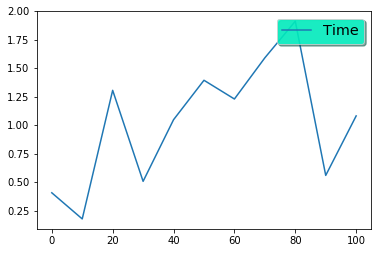

In [3]:
def timeIfaceUp():
    """Generate a time to set the interface UP"""
    min_value = 0
    max_value = 2
    uniform =3
    return chose(min_value,max_value,uniform,default_if_up_time)

experiment(timeIfaceUp)

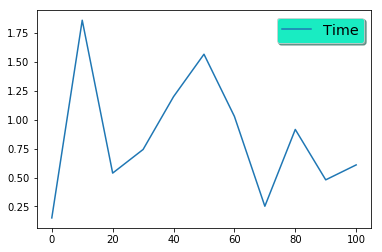

In [4]:
def timeIfaceDown():
    """Generate a time to make the interface Down"""
    min_value = 0
    max_value = 2
    uniform =3
    return chose(min_value,max_value,uniform,default_if_up_time)

experiment(timeIfaceDown)

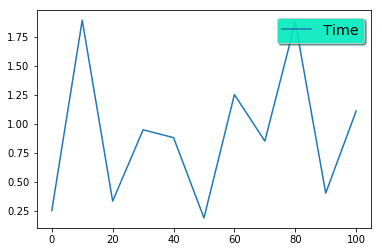

In [5]:
def timeMAC():
    """Generate a time needed to change the MAC address"""
    mean = 0
    std = 2
    normal = 3
    return chose(mean, std,normal,default_if_up_time)

experiment(timeMAC)

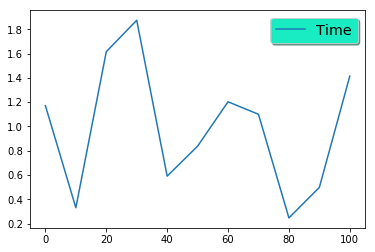

In [6]:
def timeRoute():
    """Generate a time neded to restore the IP routes"""
    weibull=3
    return chose(0,2,weibull,default_ip_route_time)

experiment(timeRoute)

In [7]:
def timeCertifcate():
    pass

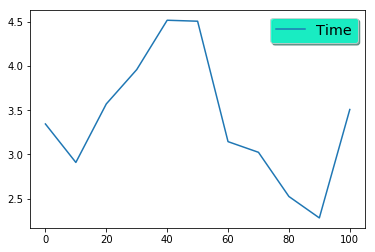

In [8]:
## Determine the local time a node need to change the Pseudonym (Tlpc)

def determineTLPC():
    timeifd = timeIfaceDown()
    timeifu = timeIfaceUp()
    timemac = timeMAC()
    timeroute = timeRoute()
    tlpc = timeifd + timeifu + timemac + timeroute
    
    #print("Time to set interface down: %.4fus"%timeifd)
    #print("Time to set interface up: %.4fus"%timeifu)
    #print("Time to change the MAC: %.4fus"%timemac)
    #print("Time to restor IP routes: %.4fus"%timeroute)
    
    #print("Total time for Pseudonym change: %.4f us"%tlpc)
    return tlpc

tlpc = determineTLPC()

experiment(determineTLPC)

In [9]:
## Determine the time imposed by pseudonym change on packet forwarding
#1:1 scheme with table entry renewal

tlpc = determineTLPC()

#the beacon interval,
beacon_interval = 0.1

# The contant data rate 
t_data = 0.05

# The time when the best forwarder forwarded the last data packet using old PID(Default to uniform) 
t_last = chose(0,1,3,0.05)

# Time to send the first beacon with the new PID
tfirst = beacon_interval + t_last 


def expected_tfwr(beacon_interval, tlpc):
    tfwr = 0

    if(beacon_interval > tlpc):
        tfwr =  beacon_interval
    
    return tfwr

print("The time for the best forwarder to send the message: %.4fus"%t_last)
print("The time the first beacon is sent with the new PID: %.4f us"%tfirst)
print("The time of the fowarding: %.4f us"%expected_tfwr(beacon_interval, tlpc))

The time for the best forwarder to send the message: 0.5171us
The time the first beacon is sent with the new PID: 0.6171 us
The time of the fowarding: 0.0000 us


The time of the fowarding: 2.5628 us


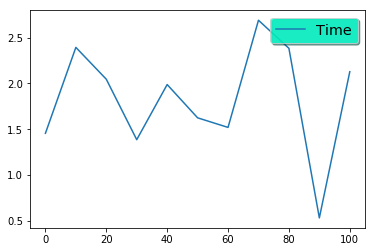

In [10]:
## Determine the time imposed by pseudonym change on packet forwarding
#1:1 scheme with with link layer callback
#the time interval between the pseudonym change trigger and the first packet sent by the predecessor to the best forwarder's old pseudonym


def expected_tfwr():
    t_fs = chose(0,2,3,0)

    t_retrans = chose(0,1,3,0)
    tlpc = determineTLPC()
    tfwr = 0.0
    if(t_fs > tlpc):
        tfwr = t_fs + t_retrans
    elif (t_fs < tlpc):
        tfwr = t_fs + t_retrans + t_data
    #elif(t_fs == tlpc)
    return tfwr

print("The time of the fowarding: %.4f us"%expected_tfwr())

experiment(expected_tfwr)

### Impelementation in RabbitMQ of the proposed solution

In [11]:
#This test requires that :
# 1. RabbitMQ server is installed and running
# 2. Install the pika module

import pika
import sys
import random


def printAddr(addr):
    print(':'.join(map(lambda x: "%02x" % x, addr)))


def genRandomMac():
    mac = [ 0x00, 0x16, 0x3e,
        random.randint(0x00, 0x7f),
        random.randint(0x00, 0xff),
        random.randint(0x00, 0xff) ]
    
    return mac

def genEUI64(mac):
    eui64 = mac[:4] + [0xff,0xfe] +  mac[4:]
    eui64[0] = eui64[0] + 0x02
    return eui64

def genpbr(mac):
    return genEUI64(mac)
    

def genlinklocal(mac):
    ll = [0xfe, 0x80,0x00,0x00] + mac
    return ll

def genGU():
    pass

def genULA():
    pass


class Pseudonym:

    def __init__(self):
        self.mac = genRandomMac()
        self.pbr = genpbr(self.mac)
        self.ipv6_link_local = genlinklocal(self.mac)
        self.ipv6_global_unique = genGU()
        self.ipv6_unique_local = genULA()
        self.public_key = None
        self.private_key = None
        self.certificate = None
        
    
    def getMAC():
        return self.mac

    def getPBR():
        return self.pbr

class Position():
    
    def __init__(self):
        self.x = 0
        self.y = 0
        self.z = 1
    
    
class CAM:
    
    def __init__(self):
        self.identifier = 0
        self.position = Position()
        self.speed = 0
        self.heading  = 0
        self.timestamp = 0
    
        
class Station:
    
    #pseudonymPool = []
    #currentPseudo = None
    #defaultPseudonymStrategy
    
   
    
    def __init__(self):
        self.pseudonymPool=self.initPool()
        self.defaultPseudonym = self.pseudonymPool.pop(random.randint(0, 1500))
        
   
    def initPool(self):
        pool = []
        for i in range(0,1500):
            pool.append(Pseudonym())
        return pool
    
    def set_pseudonym(self, pseudonym):
        """Set a new pseudonym on a station"""
        self.defaultPseudonym = pseudonym
    
    def mesure_tlpc(self):
        pass
     
    def decode(body, key):
        return True
    
    def callback(ch, method, properties, body,decode=decode):
        if(decode(body, "private key")):
            print(" [x] Received %r" % body)
        else:
            forward(body)

   
    def send(self, q):
        connection = pika.BlockingConnection(pika.ConnectionParameters(
        host='localhost'))
        channel = connection.channel()

        channel.queue_declare(queue=q)

        channel.basic_publish(exchange='',
                      routing_key=q,
                      body='CAM()')
        print(" [x] Sent 'CAM!'")
        connection.close()
    
    
    def receive(self,q,callback=callback):
        connection = pika.BlockingConnection(pika.ConnectionParameters(
        host='localhost'))
        channel = connection.channel()

        channel.queue_declare(queue=q)
        channel.basic_consume(callback,queue=q,no_ack=True)
        print(' [*] Waiting for messages. To exit press CTRL+C')
        channel.start_consuming()
       

    
    def changePID(stragetie):
        pass
    
    
    def forward(body):
        pass
    
nodeA = Station()
nodeB = Station()
nodeC = Station()
nodeA.send('route1')
nodeB.send('route1')
nodeB.send('route2')
nodeC.send('route2')
nodeA.receive('route1')
nodeC.receive('route2')

ModuleNotFoundError: No module named 'pika'

## Reader's remarks




### Pros

### Cons

### New words

In [12]:
### Prints the definifion:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from IPython.core.display import display, HTML

website = 'https://en.wiktionary.org/w/index.php?title={}&printable=yes'
larousse = 'http://www.larousse.fr/dictionnaires/anglais-francais/{}'

    
def request(url, word):
    html = urlopen(Request(url.format(word),headers={'User-Agent': 'Mozilla'})).read().decode('UTF-8')
    soup = BeautifulSoup(html,"lxml")
    
    articles = [item for item in soup.find_all('article', attrs={'role' : True})]
   
    [display(HTML(str(article))) for article in articles]
    
words = ['tailored', 'thus', 'eavesdrop', 'efficient']

[request(larousse, x) for x in words]

[None, None, None, None]